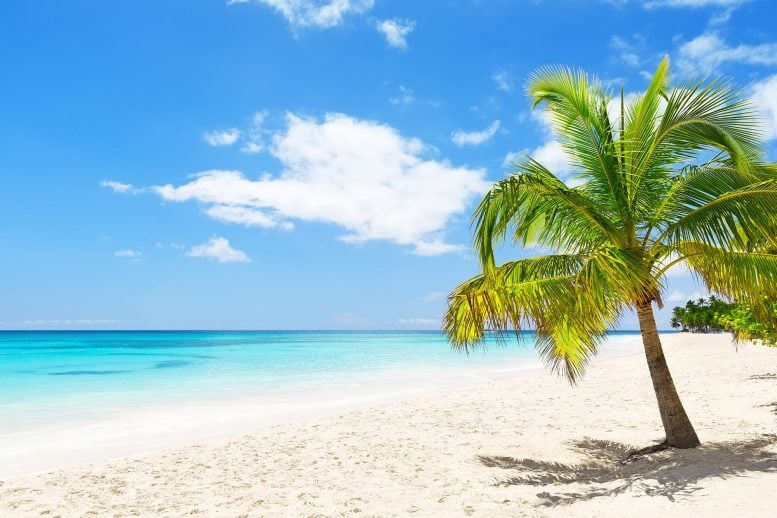

In [2]:
#Display image          
from PIL import Image
from IPython.display import display

image = Image.open(path)
display(image)

In [3]:
from ollama import chat
from pydantic import BaseModel
from pydantic import BaseModel
from typing import List, Optional, Literal



model = 'gemma3n'
# model = 'moondream'


class Object(BaseModel):
  name: str
  confidence: float
  attributes: str 

class ImageDescription(BaseModel):
    summary: str
    objects: List[Object]
    scene: str
    colors: List[str]
    time_of_day: Literal['Morning', 'Afternoon', 'Evening', 'Night']
    setting: Literal['Indoor', 'Outdoor', 'Unknown']
    text_content: Optional[str] = None

path = 'beach.jpg'

response = chat(
  model=model, # Pass in the model name
  format=ImageDescription.model_json_schema(),  # Pass in the schema for the response
  messages=[
    {
      'role': 'user',
      'content': 'Analyze this image and describe what you see, including any objects, the scene, colors and any text you can detect.',
      'images': [path],
    },
  ],
  options={'temperature': 0},  # Set temperature to 0 for more deterministic output
)

image_description = ImageDescription.model_validate_json(response.message.content)
print(image_description)

summary='A close-up shot features a vibrant display of colorful macarons arranged on a white surface. The macarons are the primary focus, showcasing a variety of pastel hues including pink, yellow, green, and blue. They are neatly aligned, creating a visually appealing pattern. The background is plain white, which helps to emphasize the colors and textures of the macarons. The lighting is bright and even, illuminating the details of the treats. There is no discernible text in the image.' objects=[Object(name='macarons', confidence=0.98, attributes='colorful, pastel hues, pink, yellow, green, blue, arranged in a pattern'), Object(name='white surface', confidence=0.95, attributes='plain, background'), Object(name='lighting', confidence=0.85, attributes='bright, even')] scene='A close-up shot of colorful macarons arranged on a white surface.' colors=['pink', 'yellow', 'green', 'blue', 'white'] time_of_day='Night' setting='Indoor' text_content=None
